In [77]:
import numpy as np
import matplotlib.pyplot as plt

project = 'july6'
traindate = '2023-08-26'
testdate = '2023-08-27'
traindate_path = '/home/sdybing/gnss-picker/cnn_models_outputs/' + project + '_fq_train/models/traindate_' + traindate + '/'
test_outputs_path = traindate_path + 'data/'
figure_save_dir = traindate_path + 'figures/'
realdata_dir = '/home/sdybing/gnss-picker/data/realdata/summer23/'

realtest_data = np.load(test_outputs_path + testdate + '_realtest_orig_data.npy')
realtest_metadata = np.load(test_outputs_path + testdate + '_realtest_metadata.npy')
realtest_target = np.load(test_outputs_path + testdate + '_realtest_target.npy')
realtest_predictions = np.load(test_outputs_path + testdate + '_realtest_predictions.npy')
rows_w_eqs = np.load(realdata_dir + 'real_metadata_rembad_rows_w_eqs.npy')

correct_eq_inds = np.load(test_outputs_path + 'realtest_data_rows_w_truepos_result_thresh004.npy')
# correct_eq_inds = np.load(test_outputs_path + 'realtest_data_rows_w_truepos_result_thresh003.npy')
# correct_eq_inds = np.load(test_outputs_path + 'realtest_data_rows_w_truepos_result_thresh005.npy')
# correct_eq_inds = np.load(test_outputs_path + 'realtest_data_rows_w_truepos_result_thresh013.npy')

metadata = np.load(test_outputs_path + 'realtest_metadata_with_results_pgd_snr_thresh004.npy')
# metadata = np.load(test_outputs_path + 'realtest_metadata_with_results_pgd_snr_thresh003.npy')
# metadata = np.load(test_outputs_path + 'realtest_metadata_with_results_pgd_snr_thresh005.npy')
# metadata = np.load(test_outputs_path + 'realtest_metadata_with_results_pgd_snr_thresh013.npy')

# 0: station name
# 1: date sample came from
# 2: sample start time
# 3: sample end time
# 4: random n counter
# 5: sample P-wave arrives at (gauss pos)
# 6: earthquake magnitude
# 7: result
# 8: PGD
# 9: SNR N
# 10: SNR E
# 11: SNR Z

In [78]:
# Need to split data into SNR bins, then run classification tests across thresholds for each bin

SNR_Ns = metadata[:,9]
SNR_Es = metadata[:,10]
SNR_Zs = metadata[:,11]

In [79]:
Ntestsnrs = []
for iii in range(len(SNR_Ns)):
    snr = SNR_Ns[iii]
    if snr == 'nan':
        Ntestsnrs.append(np.nan)
    else:
        Ntestsnrs.append(float(snr))
        
Nlogsnrs = np.log10(Ntestsnrs)
        
Nfixsnrs = []
Nnumremovedsnrs = []
for iv in range(len(Nlogsnrs)):
    snr = Nlogsnrs[iv]
    if np.isnan(snr):
        Nnumremovedsnrs.append(1)
    elif np.isinf(snr):
        Nnumremovedsnrs.append(1)
    else:
        Nfixsnrs.append(snr) 
print('Number of NaN SNR Ns removed: ' + str(len(Nnumremovedsnrs)))
print('Number of good SNR Ns left: ' + str(len(Nfixsnrs)))

Etestsnrs = []
for iii in range(len(SNR_Es)):
    snr = SNR_Es[iii]
    if snr == 'nan':
        Etestsnrs.append(np.nan)
    else:
        Etestsnrs.append(float(snr))
        
Elogsnrs = np.log10(Etestsnrs)
        
Efixsnrs = []
Enumremovedsnrs = []
for iv in range(len(Elogsnrs)):
    snr = Elogsnrs[iv]
    if np.isnan(snr):
        Enumremovedsnrs.append(1)
    elif np.isinf(snr):
        Enumremovedsnrs.append(1)
    else:
        Efixsnrs.append(snr) 
print('Number of NaN SNR Es removed: ' + str(len(Enumremovedsnrs)))
print('Number of good SNR Es left: ' + str(len(Efixsnrs)))

Ztestsnrs = []
for iii in range(len(SNR_Zs)):
    snr = SNR_Zs[iii]
    if snr == 'nan':
        Ztestsnrs.append(np.nan)
    else:
        Ztestsnrs.append(float(snr))
        
Zlogsnrs = np.log10(Ztestsnrs)
        
Zfixsnrs = []
Znumremovedsnrs = []
for iv in range(len(Zlogsnrs)):
    snr = Zlogsnrs[iv]
    if np.isnan(snr):
        Znumremovedsnrs.append(1)
    elif np.isinf(snr):
        Znumremovedsnrs.append(1)
    else:
        Zfixsnrs.append(snr) 
print('Number of NaN SNR Zs removed: ' + str(len(Znumremovedsnrs)))
print('Number of good SNR Zs left: ' + str(len(Zfixsnrs)))

/tmp/ipykernel_1224855/1515558922.py:9: RuntimeWarning: divide by zero encountered in log10
  Nlogsnrs = np.log10(Ntestsnrs)


Number of NaN SNR Ns removed: 992313
Number of good SNR Ns left: 1842


/tmp/ipykernel_1224855/1515558922.py:32: RuntimeWarning: divide by zero encountered in log10
  Elogsnrs = np.log10(Etestsnrs)


Number of NaN SNR Es removed: 992313
Number of good SNR Es left: 1842


/tmp/ipykernel_1224855/1515558922.py:55: RuntimeWarning: divide by zero encountered in log10
  Zlogsnrs = np.log10(Ztestsnrs)


Number of NaN SNR Zs removed: 992313
Number of good SNR Zs left: 1842


In [80]:
print('Ns')
print(min(Nfixsnrs))
print(max(Nfixsnrs))
print('Es')
print(min(Efixsnrs))
print(max(Efixsnrs))
print('Zs')
print(min(Zfixsnrs))
print(max(Zfixsnrs))

Ns
-1.8964072922271842
1.7088649364366306
Es
-2.3486029338617596
1.937727770369468
Zs
-5.158273484492002
2.0835177565886376


In [83]:
# Going to do from -2.5 to +2 on E component

snr_lessthanneg1 = []
snr_105 = [] # -1 to -0.5
snr_05025 = [] # -0.5 to -0.25
snr_0250 = [] # -0.25 to 0
snr_0025 = [] # 0 to 0.25
snr_02505 = [] # 0.25 to 0.5
snr_051 = []
snr_greaterthan1 = []

snr_0405 = []
snr_0506 = []
snr_0607 = []
snr_0708 = []
snr_0809 = []
snr_091 = []

counter = 0
for idx in range(len(metadata)):
    
    SNRE = metadata[idx,10]
    
    if SNRE == 'nan' or SNRE == '0.0':
        pass
    else:
        counter += 1
        snr = np.log10(float(SNRE))
        
        if snr <= -1:
            snr_lessthanneg1.append(idx)
        elif snr > -1 and snr <= -0.5:
            snr_105.append(idx)
        elif snr > -0.5 and snr <= -0.25:
            snr_05025.append(idx)
        elif snr > -0.25 and snr <= 0:
            snr_0250.append(idx)
        elif snr > 0 and snr <= 0.25:
            snr_0025.append(idx)
        elif snr > 0.25 and snr <= 0.5:
            snr_02505.append(idx)
        elif snr > 0.5 and snr <= 1:
            snr_051.append(idx)
        elif snr > 1:
            snr_greaterthan1.append(idx)
        
        if snr > 0.4 and snr <= 0.5:
            snr_0405.append(idx)
        elif snr > 0.5 and snr <= 0.6:
            snr_0506.append(idx)
        elif snr > 0.6 and snr <= 0.7:
            snr_0607.append(idx)
        elif snr > 0.7 and snr <= 0.8:
            snr_0708.append(idx)
        elif snr > 0.8 and snr <= 0.9:
            snr_0809.append(idx)
        elif snr > 0.9 and snr <= 1:
            snr_091.append(idx)

In [85]:
print(counter)
len(snr_lessthanneg1)+len(snr_105)+len(snr_05025)+len(snr_0250)+len(snr_0025)+len(snr_02505)+len(snr_051)+len(snr_greaterthan1)
# 8, 18, 84, 737, 860, 106, 12, 17


1842


1842

In [103]:
snr_greaterthan1

[25610,
 82015,
 196813,
 196825,
 402342,
 630389,
 635107,
 647029,
 660871,
 666217,
 670943,
 676348,
 681732,
 682677,
 729147,
 733194,
 856654]

In [87]:
realtest_predictions[snr_lessthanneg1].shape

(8, 128)

In [111]:
group = snr_greaterthan1
print(group[0])
print(realtest_predictions[25610].shape)
print(realtest_predictions[group][0].shape)



25610
(128,)
(128,)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
[0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.]


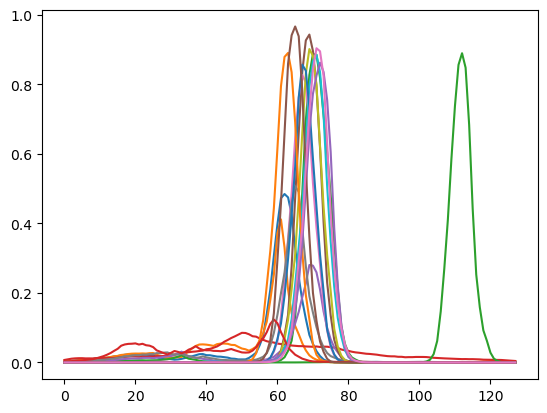

In [121]:
threshold = 0.6

# Convert the predictions arrays to single ones and zeroes

pred_binary = np.zeros(len(realtest_predictions[group]))
print(pred_binary)
iterate = np.arange(0,len(realtest_predictions[group]),1)
print(iterate)
for k in iterate:
#     print(k)
#     print('Prediction: ' + str(realtest_predictions[k]))
    plt.plot(realtest_predictions[group][k])
    i = np.where(realtest_predictions[group][k] >= threshold)[0]
    # print(i)
    if len(i) == 0:
        pred_binary[k] = 0
    elif len(i) > 0:
        pred_binary[k] = 1

#     print('Predictions: ')
print(pred_binary)
#     print(pred_binary.shape)

In [124]:
# Convert the target arrays to single ones and zeroes

targ_binary = np.zeros(len(realtest_target[group])) # Need to make this ones at indices in rows_w_eqs
print(targ_binary)
for idx in range(len(targ_binary)):
    targ_binary[idx] = 1

#     print('Targets: ')
print(targ_binary)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [125]:
group = snr_greaterthan1
groupabbrev = 'snr_greaterthan1'
title = 'SNR greater than 1'

# Decision threshold evaluation

thresholds = np.arange(0, 1.005, 0.005)
# thresholds = np.arange(0, 1.1, 0.1)
# thresholds = np.arange(0, 1, 0.1)
test_thresholds = [0.6]

# Use np.where to see whether anywhere in test_predictions is > threshold
# If there is a value that's >, the 'result' of the array is 1. If not 0
# Then compare these 1s and 0s to the target array value for PAR

accuracies = []
accuracies_per = []
precisions = []
recalls = []
F1s = []

TP_pert = []
TN_pert = []
FP_pert = []
FN_pert = []

for threshold in thresholds:

    # Convert the predictions arrays to single ones and zeroes

    pred_binary = np.zeros(len(realtest_predictions[group]))
    iterate = np.arange(0,len(realtest_predictions[group]),1)
    for k in iterate:
        # print('Prediction: ' + str(realtest_predictions[k]))
        i = np.where(realtest_predictions[group][k] >= threshold)[0]
        # print(i)
        if len(i) == 0:
            pred_binary[k] = 0
        elif len(i) > 0:
            pred_binary[k] = 1

#     print('Predictions: ')
#     print(pred_binary)
#     print(pred_binary.shape)

    # Convert the target arrays to single ones and zeroes

    targ_binary = np.zeros(len(realtest_target[group])) # Need to make this ones at indices in rows_w_eqs
    for idx in range(len(targ_binary)):
        targ_binary[idx] = 1

#     print('Targets: ')
#     print(targ_binary)

    # Calculating the accuracy, precision, recall, and F1

    num_preds = len(realtest_predictions[group]) # total number of predictions. Amanda did 50
    correct_preds = []
    wrong_preds = []
    true_pos = []
    true_neg = []
    false_pos = []
    false_neg = []

    for i in iterate:
        pred = pred_binary[i]
        targ = targ_binary[i]
        if pred == targ: # add one to list of correct predictions if matching
            correct_preds.append(1)
            if pred == 1 and targ == 1:
                true_pos.append(1)
            elif pred == 0 and targ == 0:
                true_neg.append(1)
        elif pred != targ: # add ones to list of incorrect predictions if not matching
            wrong_preds.append(1)
            if pred == 1 and targ == 0:
                false_pos.append(1)
            elif pred == 0 and targ == 1:
                false_neg.append(1)

    num_correct_preds = len(correct_preds)
    num_wrong_preds = len(wrong_preds)
    num_true_pos = len(true_pos)
    num_true_neg = len(true_neg)
    num_false_pos = len(false_pos)
    num_false_neg = len(false_neg)

    TP_pert.append(num_true_pos)
    TN_pert.append(num_true_neg)
    FP_pert.append(num_false_pos)
    FN_pert.append(num_false_neg)

In [126]:
print(max(TN_pert))
print(max(FP_pert))
print(max(TP_pert))
print(max(FN_pert))

0
0
17
17


In [127]:
save = False

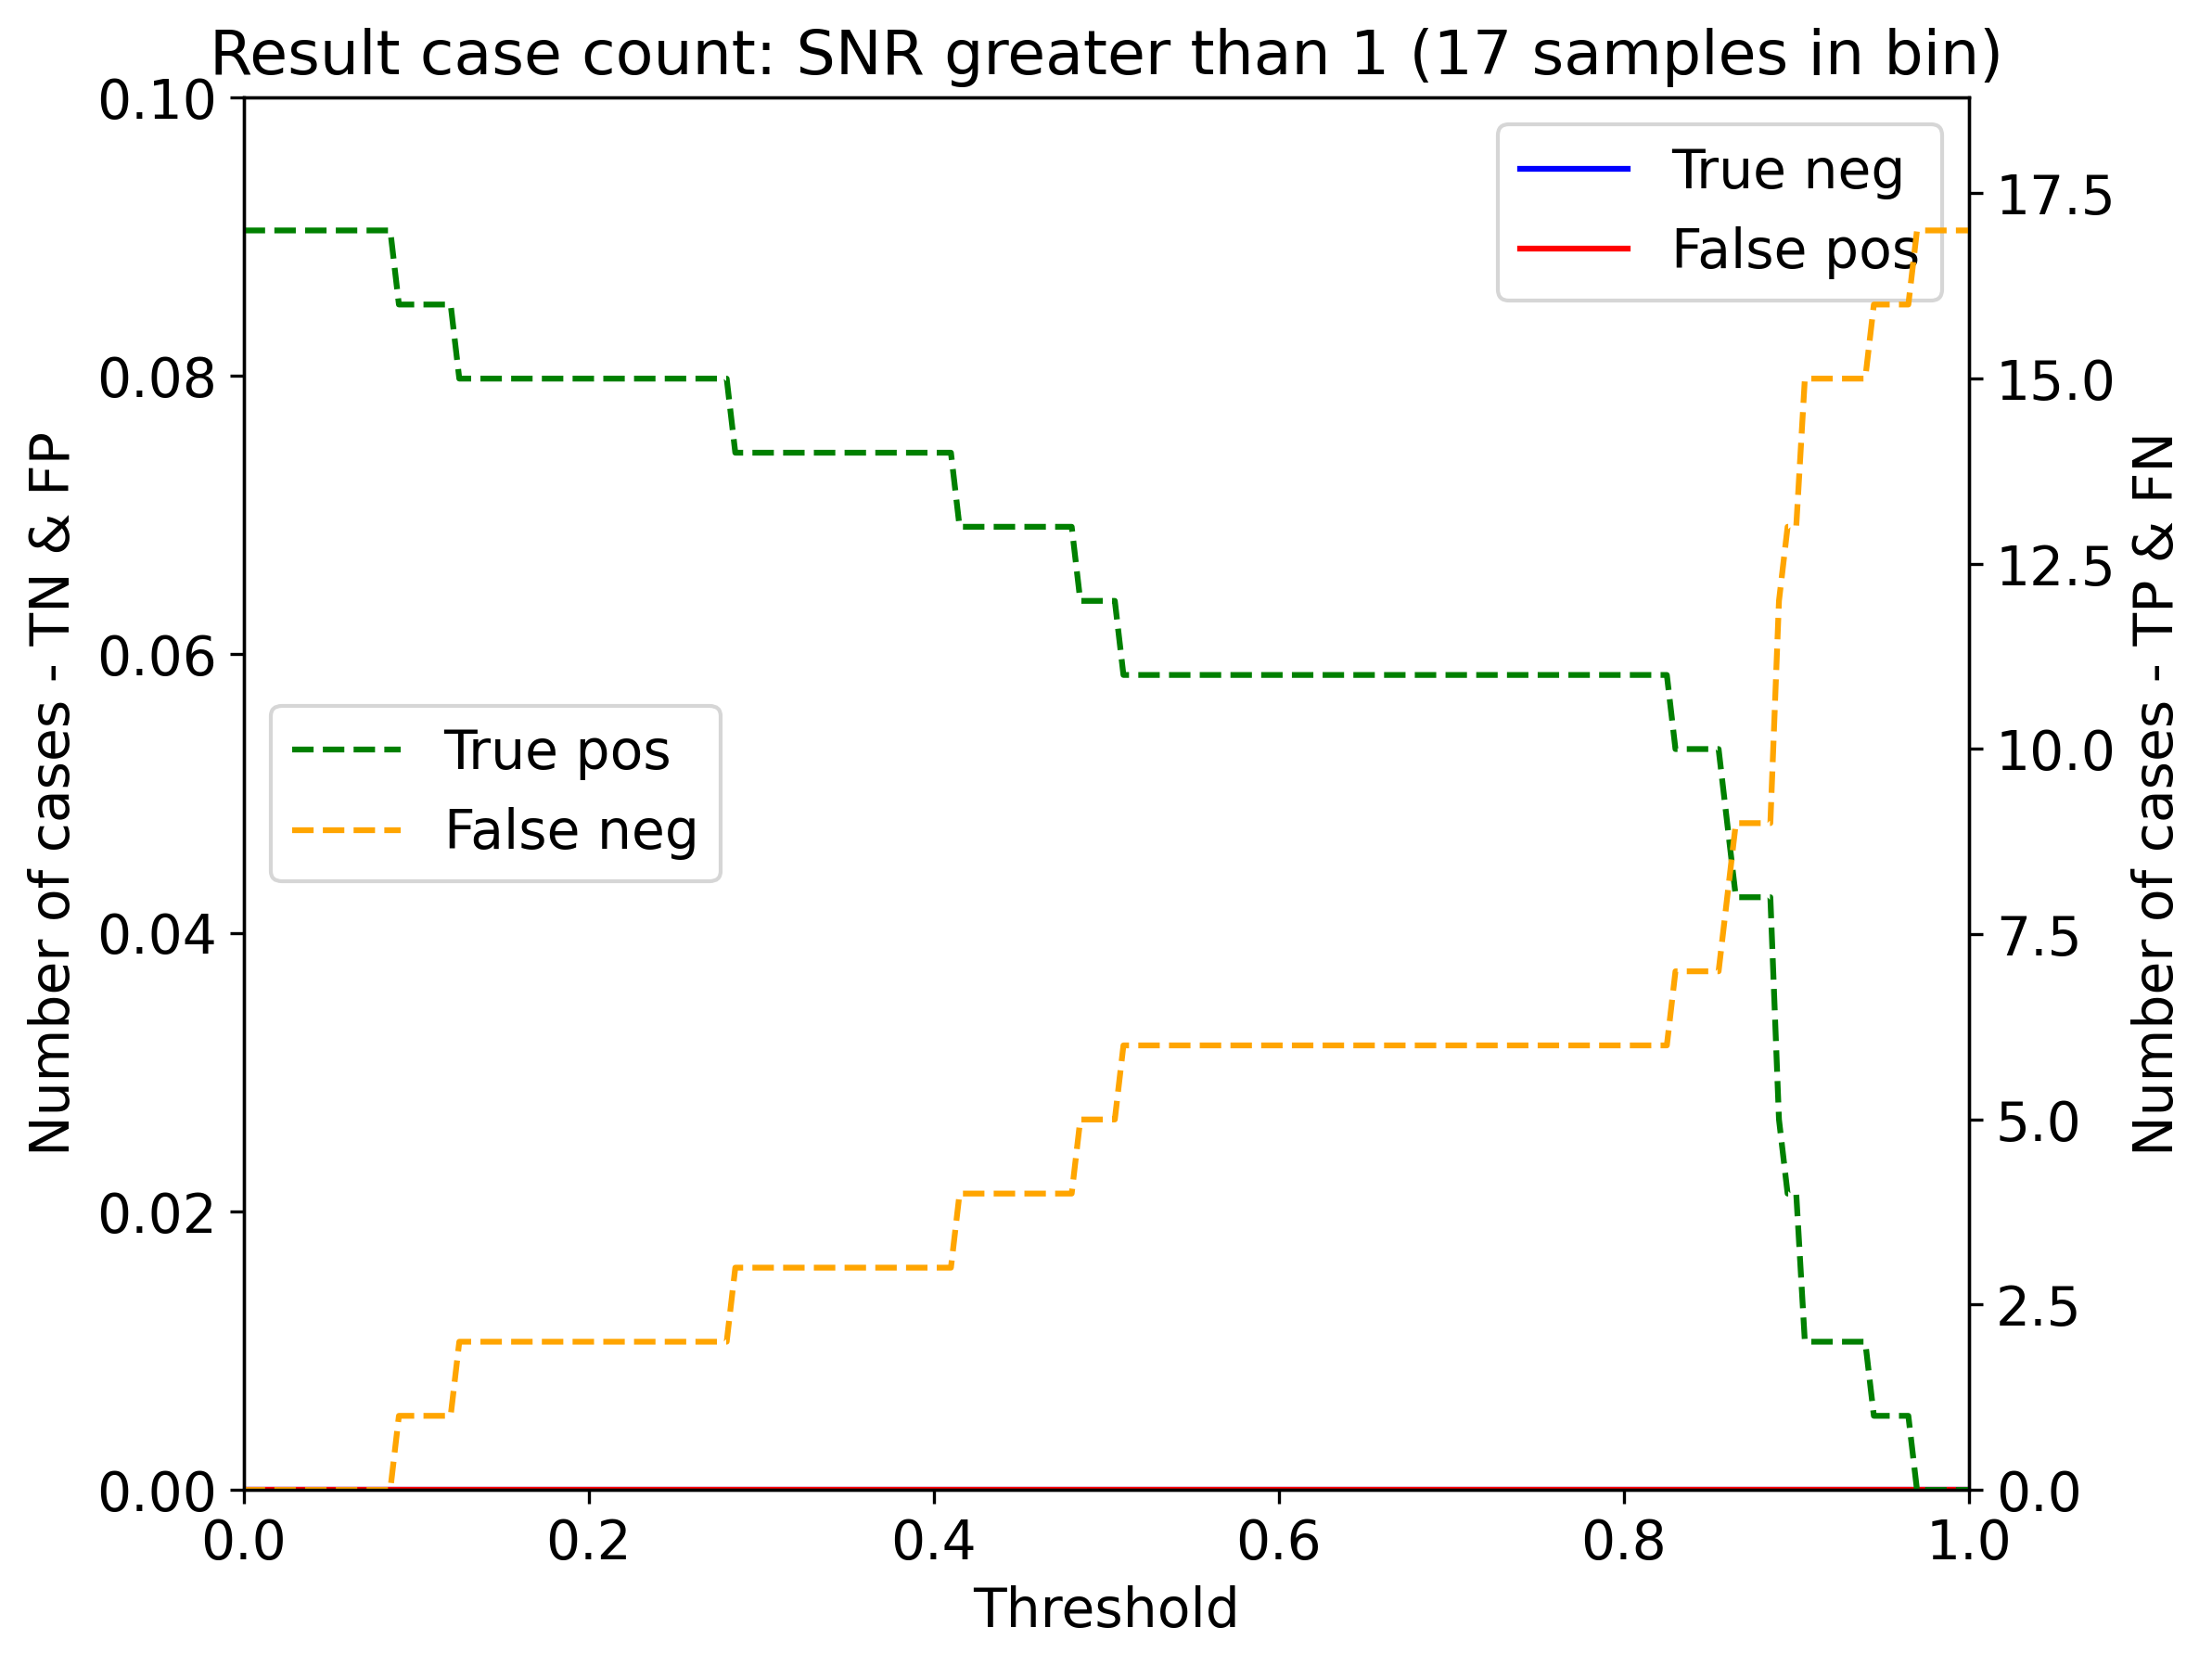

In [128]:
# Full size

plt.figure(figsize = (8,6.5), dpi = 300)
ax1 = plt.subplot(111)

ax1.plot(thresholds, np.array(TN_pert), label = 'True neg', color = 'blue')
ax1.plot(thresholds, np.array(FP_pert), label = 'False pos', color = 'red')
ax1.set_xlim(0,1)
ax2 = ax1.twinx()
ax2.plot(thresholds, np.array(TP_pert), label = 'True pos', color = 'green', linestyle = 'dashed')
ax2.plot(thresholds, np.array(FN_pert), label = 'False neg', color = 'orange', linestyle = 'dashed')
ax2.set_ylim(0, max(TP_pert)+(max(TP_pert)+1)/10)
ax1.set_ylim(0, max(FP_pert)+(max(FP_pert)+1)/10)
ax1.set_xlabel('Threshold', fontsize = 14)
ax1.set_ylabel('Number of cases - TN & FP', fontsize = 14)
ax2.set_ylabel('Number of cases - TP & FN', fontsize = 14)
ax1.tick_params(labelsize = 14)
ax2.tick_params(labelsize = 14)
ax1.legend(fontsize = 14)
ax2.legend(fontsize = 14)
plt.title('Result case count: ' + title + ' (' + str(len(pred_binary)) + ' samples in bin)', fontsize = 16)

if save:
    plt.savefig(figure_save_dir + '/realtestdata_snrbin_crossoverplots_004thresh/full/snrbin_' + groupabbrev + '_full.png', format = 'PNG', facecolor = 'white')
    plt.close();
else:
    plt.show();


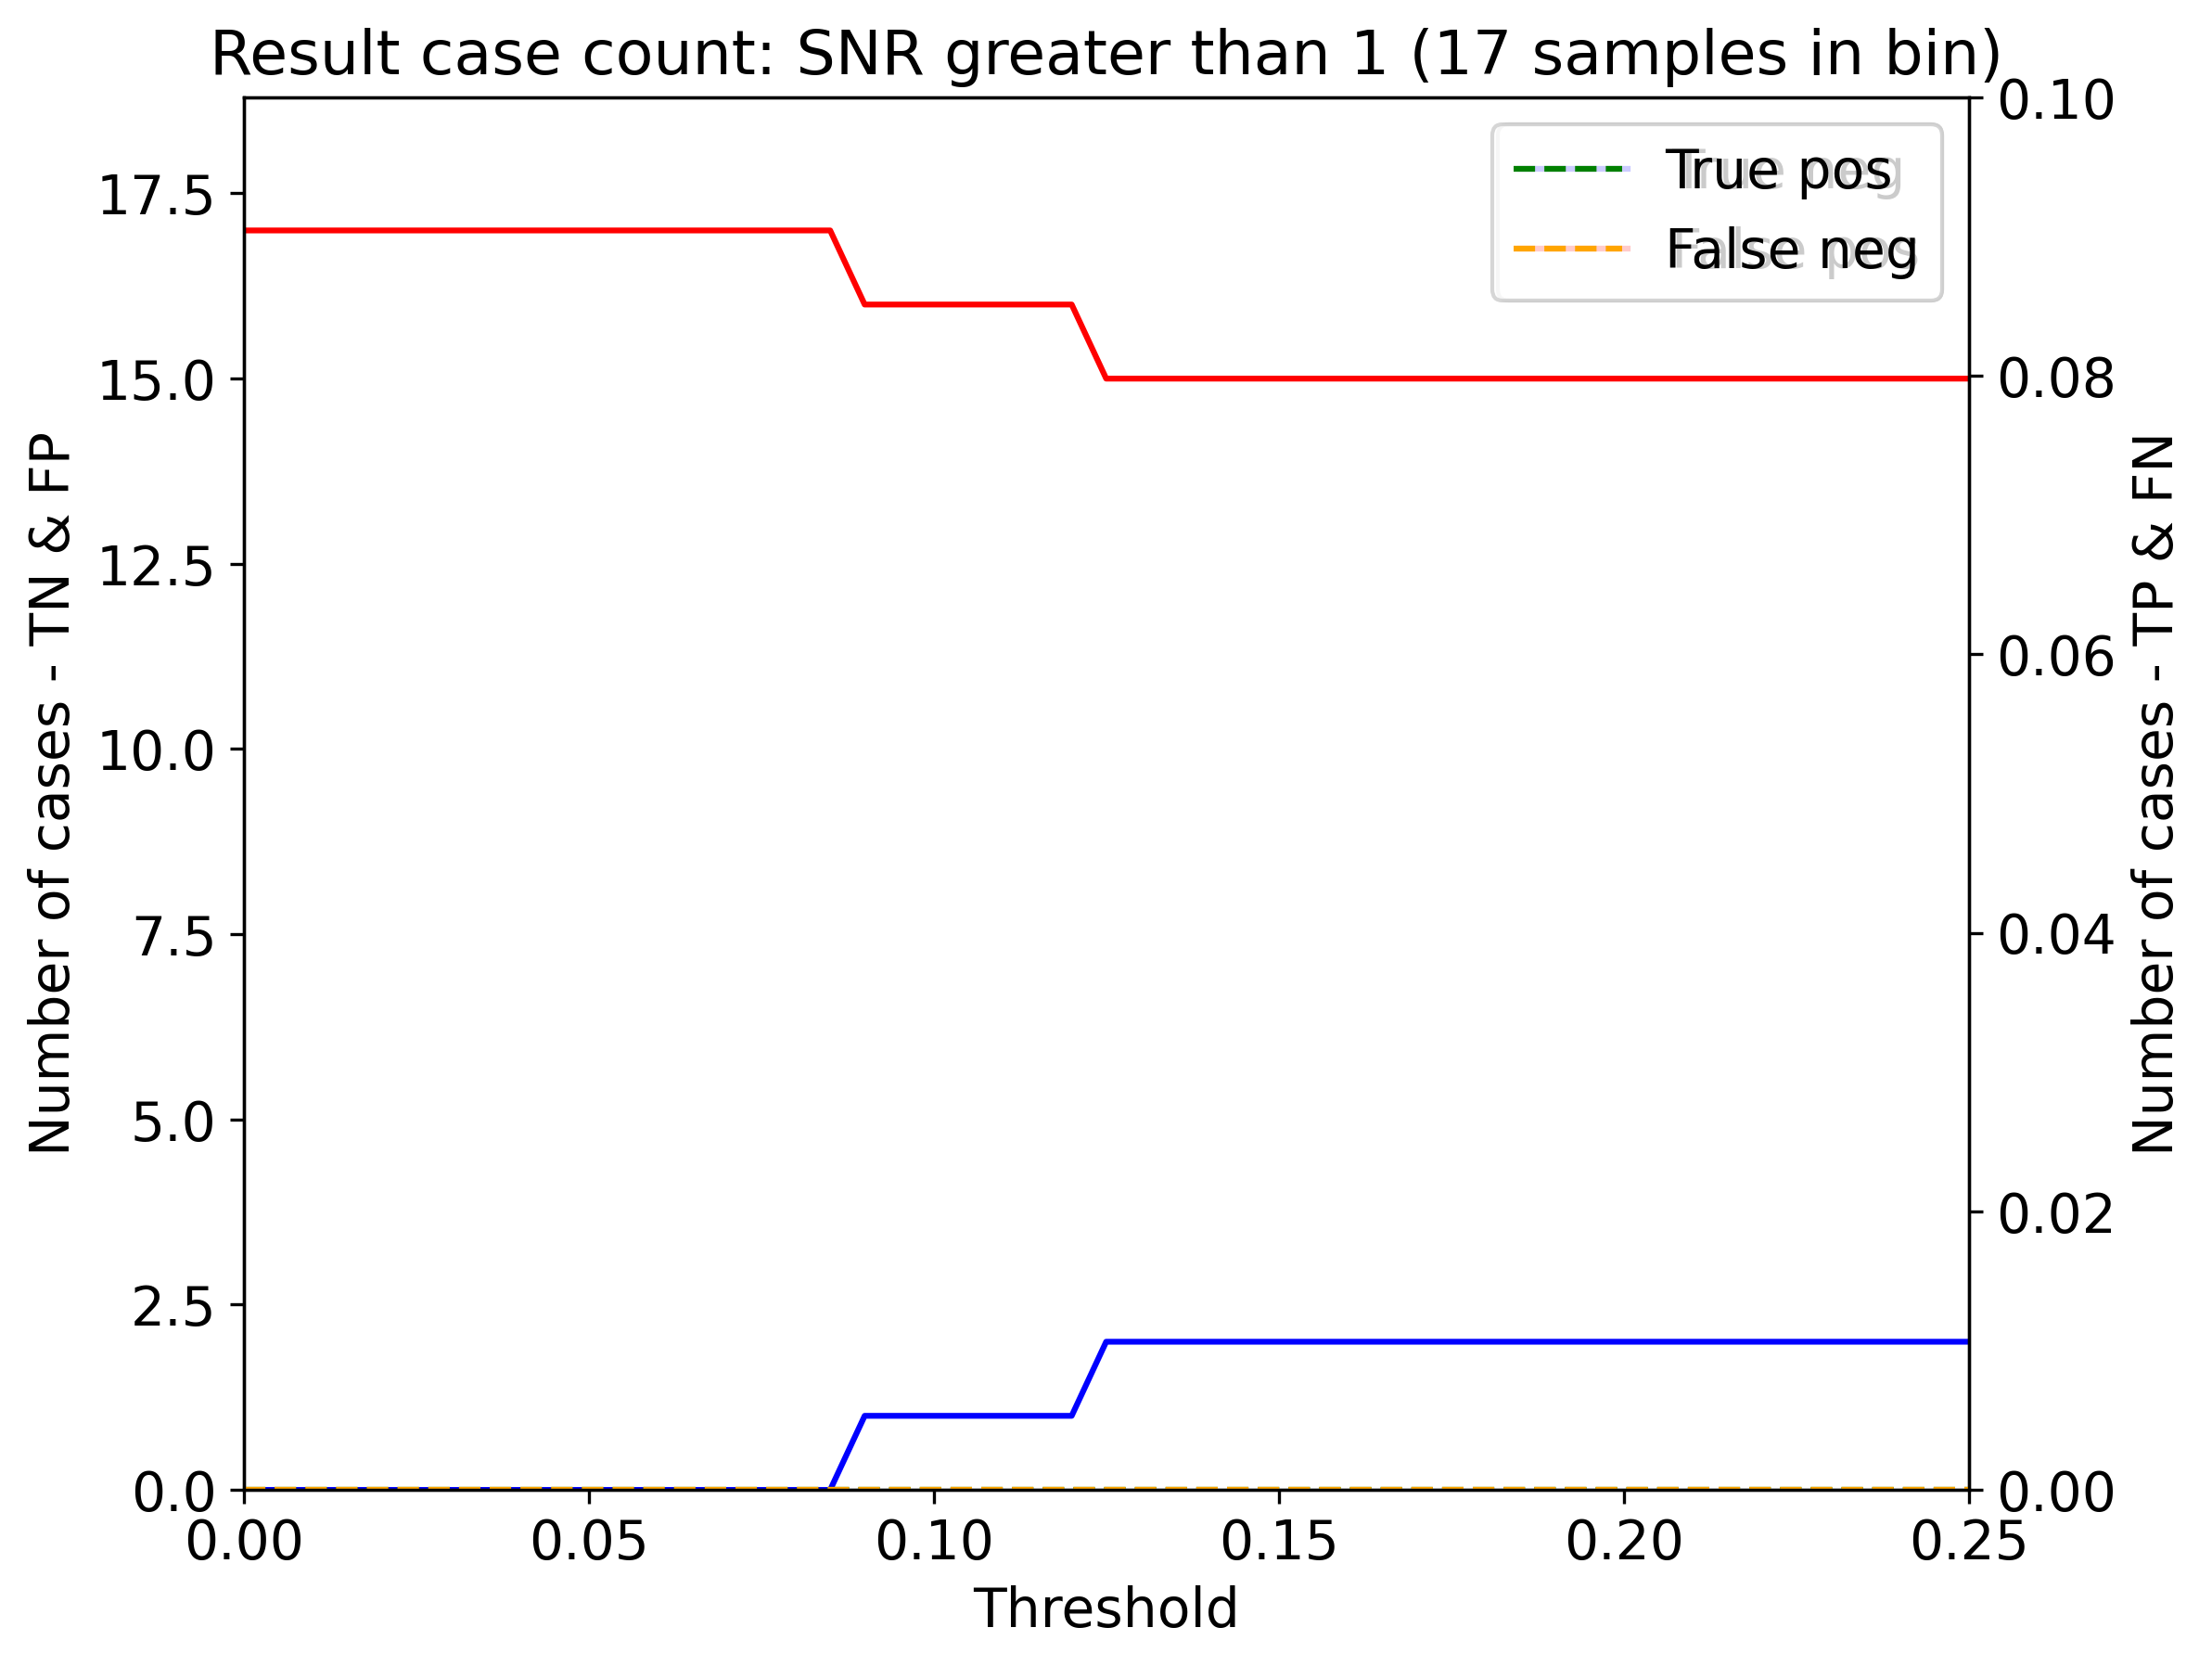

In [101]:
# Cropped

plt.figure(figsize = (8,6.5), dpi = 300)
ax1 = plt.subplot(111)

ax1.plot(thresholds, np.array(TN_pert), label = 'True neg', color = 'blue')
ax1.plot(thresholds, np.array(FP_pert), label = 'False pos', color = 'red')
ax1.set_xlim(0,0.25)
ax2 = ax1.twinx()
ax2.plot(thresholds, np.array(TP_pert), label = 'True pos', color = 'green', linestyle = 'dashed')
ax2.plot(thresholds, np.array(FN_pert), label = 'False neg', color = 'orange', linestyle = 'dashed')
ax2.set_ylim(0, max(TP_pert)+(max(TP_pert)+1)/10)
ax1.set_ylim(0, max(FP_pert)+(max(FP_pert)+1)/10)
ax1.set_xlabel('Threshold', fontsize = 14)
ax1.set_ylabel('Number of cases - TN & FP', fontsize = 14)
ax2.set_ylabel('Number of cases - TP & FN', fontsize = 14)
ax1.tick_params(labelsize = 14)
ax2.tick_params(labelsize = 14)
ax1.legend(fontsize = 14)
ax2.legend(fontsize = 14)
plt.title('Result case count: ' + title + ' (' + str(len(pred_binary)) + ' samples in bin)', fontsize = 16)

if save:
    plt.savefig(figure_save_dir + '/realtestdata_snrbin_crossoverplots_004thresh/full/snrbin_' + groupabbrev + '_crop.png', format = 'PNG', facecolor = 'white')
    plt.close();
else:
    plt.show();
